**Importing the Dependencies**

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from PIL import Image as img
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(0)   # Creating Reproduceable Seed
from tensorflow.keras import datasets   # Importing the Datasets
from tensorflow.keras.utils import to_categorical   # For one-hot encoding

**Image Data Preparation**

In [9]:
# Loading the datasets
# MNIST Handwritten Digits
# CIFAR-10

(x_train_digits, y_train_digits), (x_test_digits, y_test_digits) = datasets.mnist.load_data()
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [46]:
# Shape of the datasets
print(x_train_digits.shape, y_train_digits.shape, x_test_digits.shape, y_test_digits.shape)
print(x_train_cifar.shape, y_train_cifar.shape, x_test_cifar.shape, y_test_cifar.shape)
print(x_train_digits[0].shape, x_test_digits[0].shape)
print(x_train_cifar[0].shape, x_test_cifar[0].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(28, 28) (28, 28)
(32, 32, 3) (32, 32, 3)


**70,000 Grayscale Images --> MNIST Handwritten Dataset**

**60,000 RGB Images --> CIFAR-10**

In [52]:
# Defining the Classes
handwritten_digits = {
                        0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9'
}

cifar = {
          0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'
}

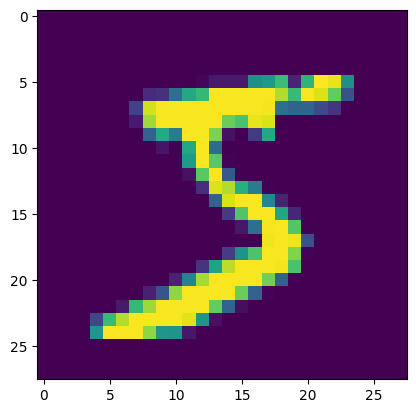

Label: 5


In [47]:
# Visualizing some samples of the datasets
plt.imshow(x_train_digits[0])
plt.show()
cv2_imshow(x_train_digits[0])
print('Label:', y_train_digits[0])

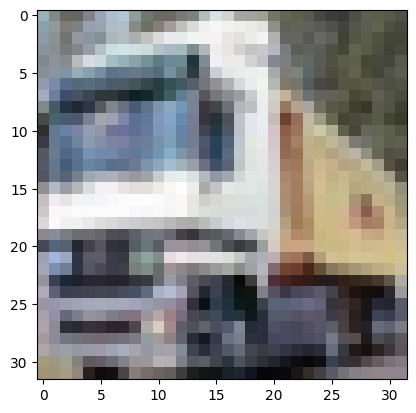

[9]
Label: truck


In [48]:
plt.imshow(x_train_cifar[1])
plt.show()
print(y_train_cifar[1])
print('Label:', cifar[9])

In [53]:
# Normalizing the dataset from 0 to 1
#Digits
x_train_digits = x_train_digits.astype('float32') / 255.0
x_test_digits = x_test_digits.astype('float32') / 255.0

#Cifar
x_train_cifar = x_train_cifar.astype('float32') / 255.0
x_test_cifar = x_test_cifar.astype('float32') / 255.0

In [54]:
print(x_train_digits[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [55]:
print(x_train_cifar[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [56]:
# One-Hot Label Encoding
#Digits
y_train_digits = to_categorical(y_train_digits, num_classes=10)
y_test_digits = to_categorical(y_test_digits, num_classes=10)

#Cifar
y_train_cifar = to_categorical(y_train_cifar, num_classes=10)
y_test_cifar = to_categorical(y_test_cifar, num_classes=10)

In [57]:
print(y_train_digits[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print()

# ReLu Activation Function